### Step 1: Read Data and analyze the Column data types

In [42]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

#Loading the Dataset
PATH = 'heart2.csv'
df = pd.read_csv(PATH)

df.info()

ModuleNotFoundError: No module named 'xgboost'

In [2]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,63,F,TA,145,233,1,Normal,150,No,2.3,Up,1
1,37,F,ASY,130,250,0,ST,187,No,3.5,Up,1
2,41,M,NAP,130,204,0,Normal,172,No,1.4,Flat,1
3,56,F,NAP,120,236,0,ST,178,No,0.8,Flat,1
4,57,M,ATA,120,354,0,ST,163,Yes,0.6,Flat,1
5,57,F,ATA,140,192,0,ST,148,No,0.4,Down,1
6,56,M,NAP,140,294,0,Normal,153,No,1.3,Down,1
7,44,F,NAP,120,263,0,ST,173,No,0.0,Flat,1
8,52,F,ASY,172,199,1,ST,162,No,0.5,Flat,1
9,57,F,ASY,150,168,0,ST,174,No,1.6,Flat,1


In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,2808.000000,2808.000000,2808.000000,2808.000000,2808.000000,2808.000000,2808.000000
mean,53.431624,131.951211,250.194444,0.170228,144.181268,0.955021,0.507123
std,9.277937,17.888348,55.422887,0.375900,24.599251,1.119763,0.500038
min,28.000000,0.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,46.000000,120.000000,212.000000,0.000000,126.000000,0.000000,0.000000
50%,54.000000,130.000000,245.000000,0.000000,146.000000,0.600000,1.000000
75%,60.000000,140.000000,288.000000,0.000000,162.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:>

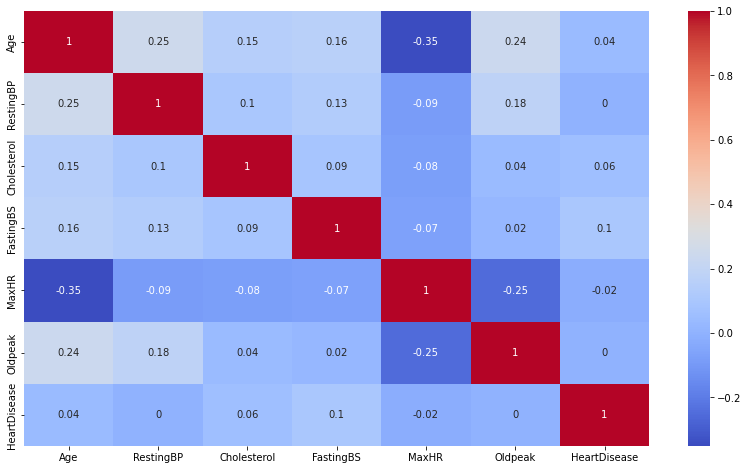

In [4]:
plt.figure(figsize=(14, 8))
corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 1440x1440 with 0 Axes>

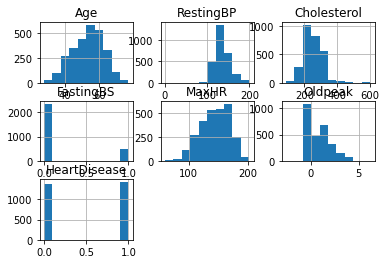

In [5]:
plt.figure(figsize=(20, 20))
df.hist()

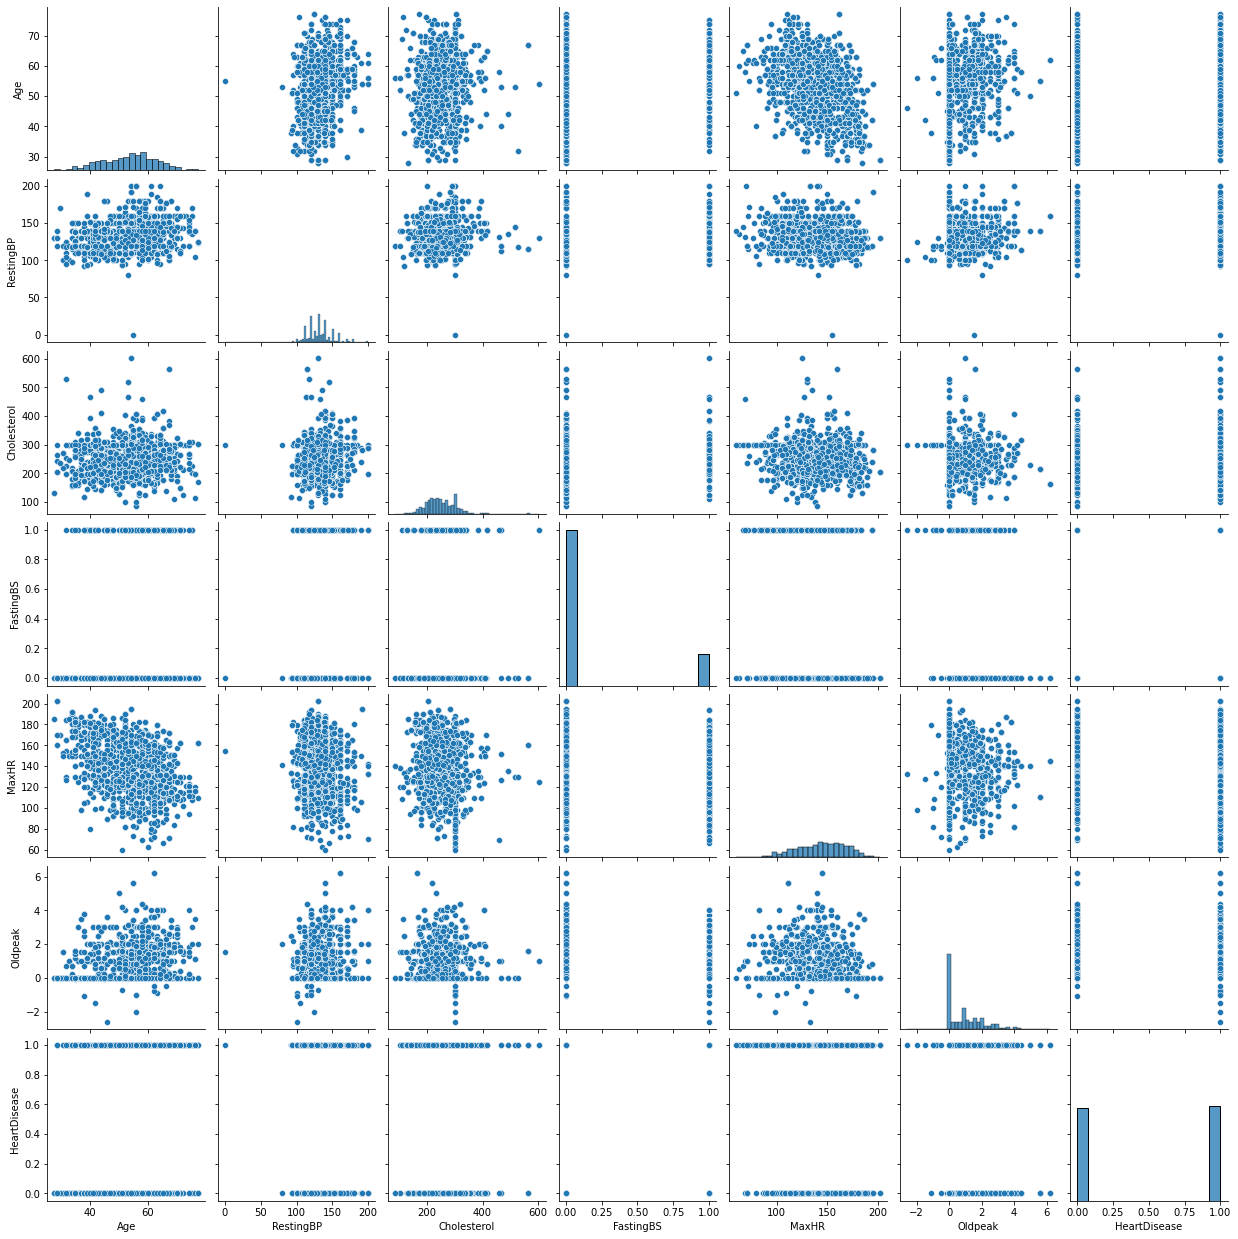

In [6]:
sns.pairplot(data=df)

### Step 2: Data Pre-Processing and Exploratory Data Analysis (EDA)

#### 2.1 Categorical data -> get dummies -> Handling Dummy variable trap as per the Model

In [7]:
df = pd.get_dummies(df, columns = ['Sex','ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina','ST_Slope'], drop_first=False)

In [8]:
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_No,ExerciseAngina_Yes,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,63,145,233,150,2.3,1,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
1,37,130,250,187,3.5,1,1,0,1,0,...,1,0,0,0,1,1,0,0,0,1
2,41,130,204,172,1.4,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,1,0,0,0,1,1,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,1,...,1,0,0,0,1,0,1,0,1,0


#### 2.2 Data Standardization

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col_to_scale = ['Age','RestingBP', 'Cholesterol','MaxHR','Oldpeak']
df[col_to_scale] = sc.fit_transform(df[col_to_scale])

In [10]:
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

#### 2.3 Determine correlations between independent and dependent variables

<AxesSubplot:>

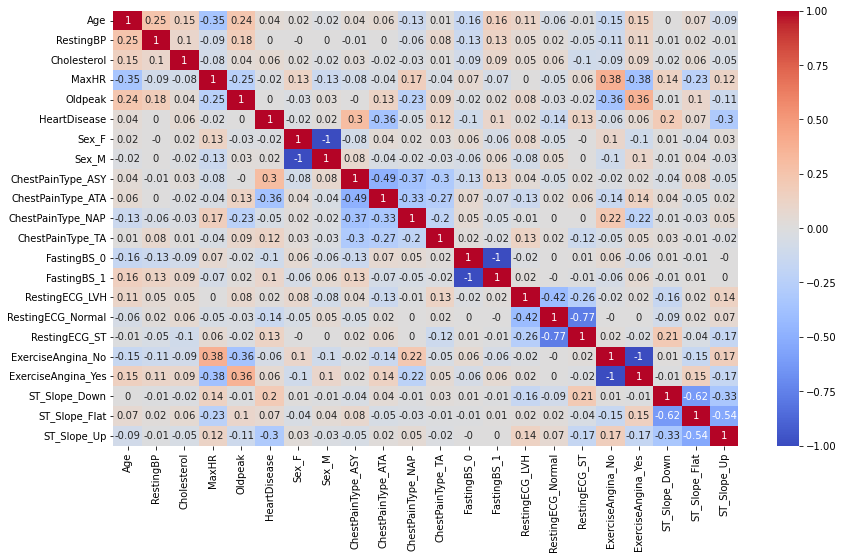

In [11]:
plt.figure(figsize=(14, 8))
corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>,
        <AxesSubplot:title={'center':'Sex_F'}>,
        <AxesSubplot:title={'center':'Sex_M'}>,
        <AxesSubplot:title={'center':'ChestPainType_ASY'}>,
        <AxesSubplot:title={'center':'ChestPainType_ATA'}>],
       [<AxesSubplot:title={'center':'ChestPainType_NAP'}>,
        <AxesSubplot:title={'center':'ChestPainType_TA'}>,
        <AxesSubplot:title={'center':'FastingBS_0'}>,
        <AxesSubplot:title={'center':'FastingBS_1'}>,
        <AxesSubplot:title={'center':'RestingECG_LVH'}>],
       [<AxesSubplot:title={'center':'RestingECG_Normal'}>,
        <AxesSubplot:title={'center':'RestingECG_ST'}>,
        <AxesSubplot:title={'center':'ExerciseAngina_No'}>,
        <AxesSub

<Figure size 2160x2160 with 0 Axes>

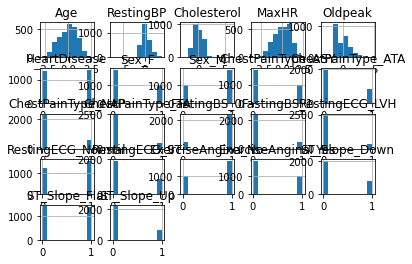

In [12]:
plt.figure(figsize=(30, 30))
df.hist()

### Step 3: Model building

#### 3.1 Model: Logistic Regression

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [14]:
X_train.shape

(2246, 21)

In [15]:
X_test.shape

(562, 21)

In [16]:
y_train.shape

(2246,)

In [17]:
y_test.shape

(562,)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression()

In [19]:
y_pred_logr = logr.predict(X_test)

In [20]:
y_pred_logr.shape

(562,)

In [21]:
score_logr = round(accuracy_score(y_pred_logr, y_test)*100,2)
print(f'The Logistic Regression Accuracy Score is : {str(score_logr)}%')

The Logistic Regression Accuracy Score is : 71.17%


In [22]:
print('Logistic Regression Confusion Matrix: \n', confusion_matrix(y_pred_logr, y_test),'\n')
print('Logistic Regression Classification Report: \n', classification_report(y_pred_logr, y_test))

Logistic Regression Confusion Matrix: 
 [[191  86]
 [ 76 209]] 

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.69      0.70       277
           1       0.71      0.73      0.72       285

    accuracy                           0.71       562
   macro avg       0.71      0.71      0.71       562
weighted avg       0.71      0.71      0.71       562



<AxesSubplot:title={'center':'Confusion matrix of Logistic Regression'}>

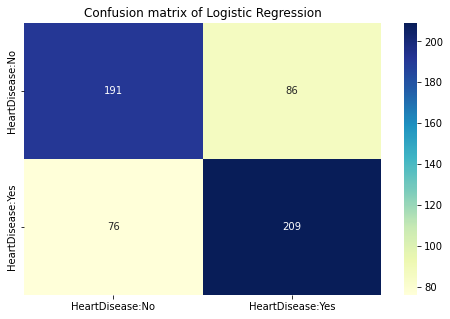

In [23]:
cm_lr = confusion_matrix(y_pred_logr, y_test)
conf_matrix=pd.DataFrame(data=cm_lr,columns=['HeartDisease:No','HeartDisease:Yes'],index=['HeartDisease:No','HeartDisease:Yes'])
plt.figure(figsize = (8,5))
plt.title("Confusion matrix of Logistic Regression")

sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

#### 3.2 Model: K Nearest Neighbors (knn)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
y_pred3=knn.predict(X_test)
accuracy_score(y_test,y_pred3)

0.7615658362989324

In [28]:
score= []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

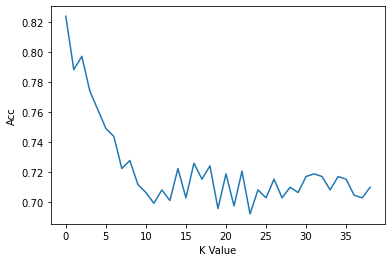

In [29]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred3=knn.predict(X_test)
accuracy_score(y_test,y_pred3)

0.8238434163701067

In [51]:
knn = KNeighborsRegressor()
params = {'n_neighbors': range(2, 101), 'weights': ['uniform', 'distance']}
model = GridSearchCV(knn, params, cv=5, scoring='neg_mean_squared_error', n_jobs=4)
model.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=4,
             param_grid={'n_neighbors': range(2, 101),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

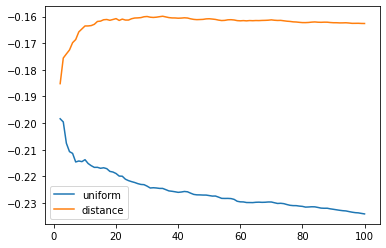

In [52]:
mse_uniform = model.cv_results_['mean_test_score'][::2]
mse_distance = model.cv_results_['mean_test_score'][1::2]

plt.plot(range(2, 101), mse_uniform)
plt.plot(range(2, 101), mse_distance)
plt.legend(labels=['uniform', 'distance'])
plt.show()

In [53]:
k = list(range(20,101))
kvalue = k[np.array(mse_distance).argmin()]
print(f'k value = {kvalue}')

k value = 20


In [54]:
knn = KNeighborsRegressor(n_neighbors=kvalue)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn.shape

(562,)

In [55]:
score_knn = round(accuracy_score(y_pred_knn.round(), y_test)*100,2)
print(f'The KNN Regression Accuracy Score is : {str(score_knn)}%')

The KNN Regression Accuracy Score is : 69.57%


In [56]:
print('KNN Regression Confusion Matrix: \n', confusion_matrix(y_pred_knn.round(), y_test),'\n')
print('KNN Regression Classification Report: \n', classification_report(y_pred_knn.round(), y_test))

KNN Regression Confusion Matrix: 
 [[204 108]
 [ 63 187]] 

KNN Regression Classification Report: 
               precision    recall  f1-score   support

         0.0       0.76      0.65      0.70       312
         1.0       0.63      0.75      0.69       250

    accuracy                           0.70       562
   macro avg       0.70      0.70      0.70       562
weighted avg       0.71      0.70      0.70       562



<AxesSubplot:title={'center':'Confusion matrix of K-Nearest Neighbors'}>

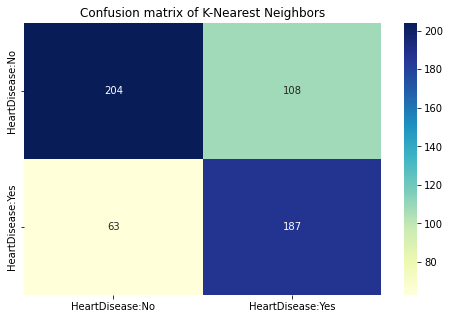

In [57]:
cm_knn = confusion_matrix(y_pred_knn.round(), y_test)
conf_matrix=pd.DataFrame(data=cm_knn,columns=['HeartDisease:No','HeartDisease:Yes'],index=['HeartDisease:No','HeartDisease:Yes'])
plt.figure(figsize = (8,5))
plt.title("Confusion matrix of K-Nearest Neighbors")

sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

#### 3.3 Model: Decision Trees

In [1]:
X = X.to_numpy()
y = y.to_numpy()

NameError: name 'X' is not defined

In [59]:
kf = KFold(n_splits=5, shuffle=True)
max_depth = []

max_depth_range = list(range(2, 100))
for k in max_depth_range:
    SSE = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        dtr = DecisionTreeRegressor(max_depth= k, random_state=0)
        dtr.fit(X_train, y_train)
        MSE = mean_squared_error(y_test, dtr.predict(X_test)) 
    max_depth.append(MSE)

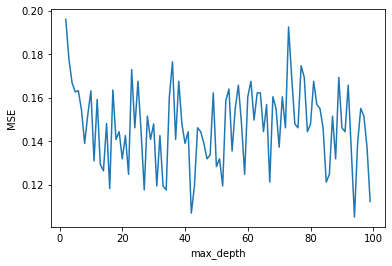

In [60]:
plt.xlabel("max_depth")
plt.ylabel("MSE")
plt.plot(max_depth_range, max_depth)
plt.show()

In [61]:
max_depth_best = max_depth_range[np.array(max_depth).argmin()]
print(f'The best choice of max_depth: {max_depth_best}')

The best choice of max_depth: 94


In [62]:
from sklearn.tree import export_graphviz
dtr = DecisionTreeRegressor(max_depth= max_depth_best, random_state=1)
dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)
y_pred_dtr.shape

# export_graphviz(dtr, out_file='tree.dot')

(561,)

In [63]:
score_dtr = round(accuracy_score(y_pred_dtr.round(), y_test)*100,2)
print(f'The Decision Tree Regression Accuracy Score is : {str(score_dtr)}%')

The Decision Tree Regression Accuracy Score is : 87.88%


In [64]:
print('Decision Tree Regression Confusion Matrix: \n', confusion_matrix(y_pred_dtr.round(), y_test),'\n')
print('Decision Tree Regression Classification Report: \n', classification_report(y_pred_dtr.round(), y_test))

Decision Tree Regression Confusion Matrix: 
 [[243  36]
 [ 32 250]] 

Decision Tree Regression Classification Report: 
               precision    recall  f1-score   support

         0.0       0.88      0.87      0.88       279
         1.0       0.87      0.89      0.88       282

    accuracy                           0.88       561
   macro avg       0.88      0.88      0.88       561
weighted avg       0.88      0.88      0.88       561



<AxesSubplot:title={'center':'Confusion matrix of Decision Tree Regression'}>

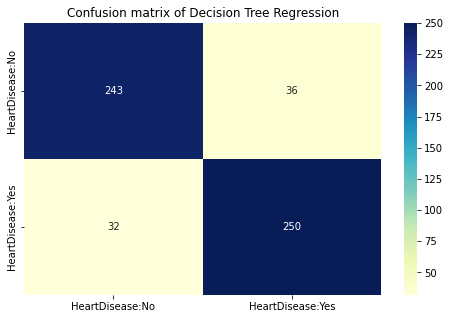

In [65]:
cm_dtr = confusion_matrix(y_pred_dtr.round(), y_test)
conf_matrix=pd.DataFrame(data=cm_dtr,columns=['HeartDisease:No','HeartDisease:Yes'],index=['HeartDisease:No','HeartDisease:Yes'])
plt.figure(figsize = (8,5))
plt.title("Confusion matrix of Decision Tree Regression")

sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

#### 3.4 Model: Random Forest Regressor and Feature Importance

In [66]:
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

rfr = RandomForestRegressor()

In [67]:
rfr.fit(X,y)

RandomForestRegressor()

In [68]:
importance = rfr.feature_importances_
sorted(importance)
res = sorted(importance, key = lambda x: x, reverse = True)[:10]
res

[0.14063289627351086,
 0.1320758100778653,
 0.13091048848257092,
 0.10690625907984727,
 0.09911630950928382,
 0.09851779896380905,
 0.08842058478631722,
 0.027422544192850805,
 0.026378521372345854,
 0.021734364285247363]

In [69]:
def feature_importance(m,data):
    importance = m.feature_importances_
    importance = pd.DataFrame(importance,index=data.columns,columns=['Importance'])
    return importance.sort_values(by=['Importance'],ascending=False)[:10]

importance = feature_importance(rfr,X)
# importance[:]

In [70]:
importance

,Importance
MaxHR,0.140633
ChestPainType_ATA,0.132076
Cholesterol,0.130910
Oldpeak,0.106906
Age,0.099116
RestingBP,0.098518
ST_Slope_Up,0.088421
RestingECG_ST,0.027423
ChestPainType_NAP,0.026379
ExerciseAngina_Yes,0.021734


<AxesSubplot:>

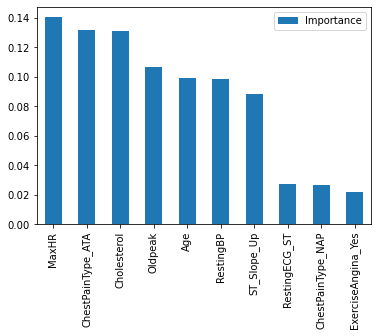

In [71]:
importance.plot(kind='bar')

In [72]:
params = {'n_estimators': range(20, 101), 'bootstrap':[True], 'max_depth':[1000], 'max_features': ['auto','sqrt','log2']}
model = GridSearchCV(rfr, params, cv=5, scoring='neg_mean_squared_error', n_jobs=4)
model.fit(X, y)

model.cv_results_
model.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_bootstrap', 'param_max_depth', 'param_max_features', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [73]:
print(len(model.cv_results_['mean_test_score']))
mse_auto = model.cv_results_['mean_test_score'][::3]

243


In [74]:
mse_sqrt = model.cv_results_['mean_test_score'][1::3]
mse_log2 = model.cv_results_['mean_test_score'][2::3]

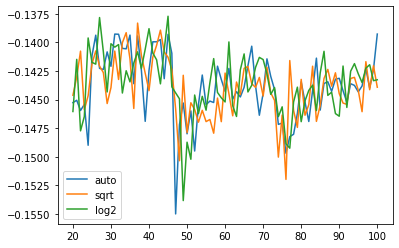

In [75]:
plt.plot(range(20, 101), mse_auto)
plt.plot(range(20, 101), mse_sqrt)
plt.plot(range(20, 101), mse_log2)
plt.legend(labels=['auto', 'sqrt', 'log2'])
plt.show()

In [76]:
Tree_candidates = list(range(20,101))
TreeNodes_auto = Tree_candidates[np.array(mse_auto).argmin()]

TreeNodes_sqrt = Tree_candidates[np.array(mse_sqrt).argmin()]

TreeNodes_log2 = Tree_candidates[np.array(mse_log2).argmin()]
TreeNodes_log2

print(f'TreeNodes_auto = {TreeNodes_auto}\nTreeNodes_sqrt = {TreeNodes_sqrt}\nTreeNodes_log2 = {TreeNodes_log2}')


TreeNodes_auto = 47
TreeNodes_sqrt = 76
TreeNodes_log2 = 49


In [77]:
rfr = RandomForestRegressor(n_estimators = TreeNodes_auto, random_state = 1)
rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)
y_pred_rfr.shape

(561,)

In [78]:
score_rfr = round(accuracy_score(y_pred_rfr.round(), y_test)*100,2)
print(f'The Random Forest Regression Accuracy Score is : {str(score_rfr)}%')

The Random Forest Regression Accuracy Score is : 88.41%


In [79]:
print('Random Forest Regression Confusion Matrix: \n', confusion_matrix(y_pred_rfr.round(), y_test),'\n')
print('Random Forest Regression Classification Report: \n', classification_report(y_pred_rfr.round(), y_test))

Random Forest Regression Confusion Matrix: 
 [[242  32]
 [ 33 254]] 

Random Forest Regression Classification Report: 
               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       274
         1.0       0.89      0.89      0.89       287

    accuracy                           0.88       561
   macro avg       0.88      0.88      0.88       561
weighted avg       0.88      0.88      0.88       561



<AxesSubplot:title={'center':'Confusion matrix of Random Forest Regression'}>

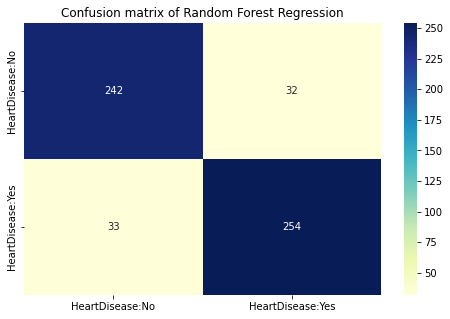

In [80]:
cm_rfr = confusion_matrix(y_pred_rfr.round(), y_test)
conf_matrix=pd.DataFrame(data=cm_rfr,columns=['HeartDisease:No','HeartDisease:Yes'],index=['HeartDisease:No','HeartDisease:Yes'])
plt.figure(figsize = (8,5))
plt.title("Confusion matrix of Random Forest Regression")

sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Step 4: Final Scores for each Model and Comparison

In [81]:
models = pd.DataFrame({
    'Models': ['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest'],
    'Accuracy_Score': [score_logr, score_knn, score_dtr, score_rfr]})
models.sort_values(by='Accuracy_Score', ascending=False)

,Models,Accuracy_Score
3,Random Forest,88.41
2,Decision Tree,87.88
0,Logistic Regression,71.17
1,K Nearest Neighbors,69.57


<AxesSubplot:xlabel='Models', ylabel='Accuracy_Score'>

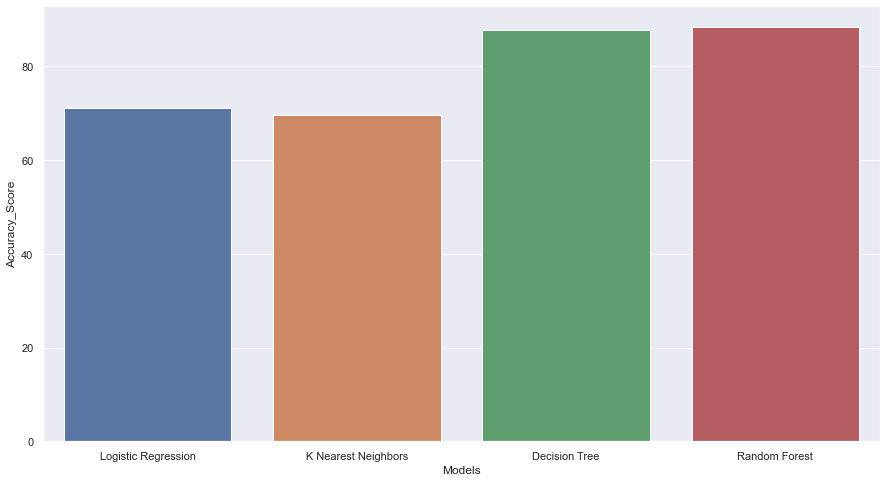

In [82]:
sns.set(rc={'figure.figsize':(15,8)})
Models = models['Models']
Accuracy_Scores = models['Accuracy_Score']

sns.barplot(x=Models, y=Accuracy_Scores)

In [56]:
print('Conclusion: From the above graph of Models vs Accuracy Score, K Nearest Neighbors model is the best fit')

Conclusion: From the above graph of Models vs Accuracy Score, K Nearest Neighbors model is the best fit
